In [ ]:
#Challenge
#Use Logistic Regression to predict Titanic Survivors
#Pick variables for model
#Plot histograms of the character variables
#Transform the character variables into binary
#Create a training and a test set
#Use logistic regression
#Assess accuracy through the classification report

#Directory, Libraries, and Data

In [1]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression


In [6]:
#Libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
#Load data
df=pd.read_csv("titanic.csv")
df.head(1)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.25


#Data Analysis

In [28]:
#Select variables
df=df.drop(columns="Name")
#df=df[["Survived","Pclass","Sex","Age","Siblings/Spouses Aboard","Parents/Children Aboard", "Fare"]]
df.head(1)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.25


In [11]:
#Summary statistics
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Siblings/Spouses Aboard'}>],
       [<Axes: title={'center': 'Parents/Children Aboard'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

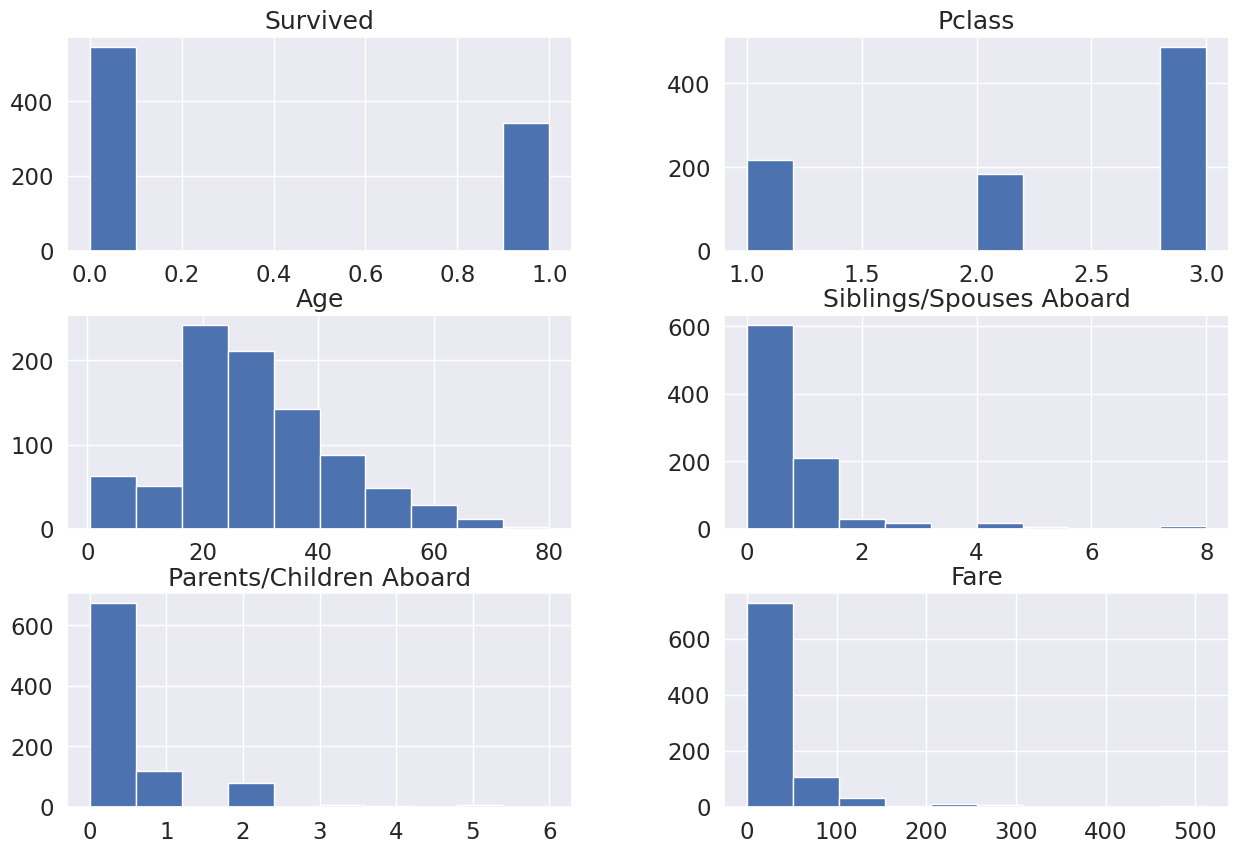

In [29]:
#Histograms
df.hist(figsize=(15,10))

In [30]:
#Transform character variables into binary
df=pd.get_dummies(data=df,drop_first=True)
df.head(1)

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
0,0,3,22.0,1,0,7.25,1


<Axes: >

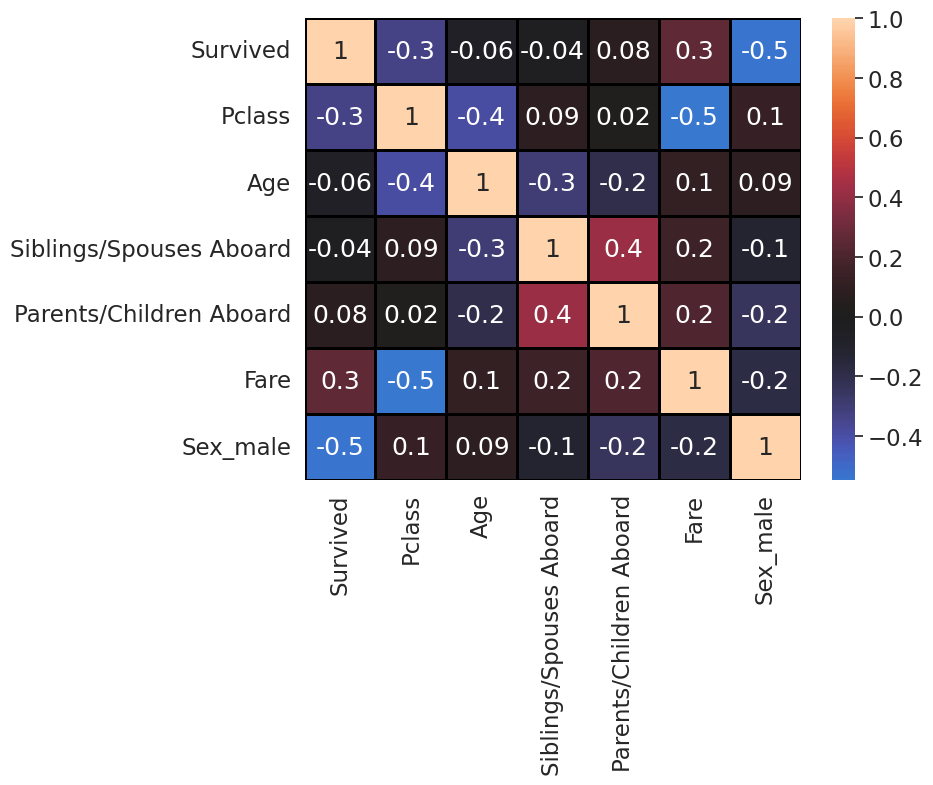

In [31]:
#Correlation matrix
plt.figure(figsize=(8,6))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),
            annot=True,
            fmt='.1g',
            center=0,
            linewidth=1,
            linecolor='black')

#Logistic regression

In [34]:
df.head(0)

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male


In [40]:
#Prepare X and Y
y=df.Survived
X=df.drop(columns="Survived")
X=sm.add_constant(X)

In [42]:
#Training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=1502)

#Logistic Regression


In [43]:
model=sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.405125
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  709
Model:                          Logit   Df Residuals:                      702
Method:                           MLE   Df Model:                            6
Date:                Fri, 18 Aug 2023   Pseudo R-squ.:                  0.3915
Time:                        10:24:16   Log-Likelihood:                -287.23
converged:                       True   LL-Null:                       -472.06
Covariance Type:            nonrobust   LLR p-value:                 9.247e-77
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       6.2418      0.686      9.101      0.000       4.898   

In [45]:
#Predictions
predictions=model.predict(X_test)
predictions=np.where(predictions>0.5,1,0)

In [46]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       108
           1       0.65      0.63      0.64        70

    accuracy                           0.72       178
   macro avg       0.71      0.70      0.70       178
weighted avg       0.72      0.72      0.72       178

